# Etude de la structure de bande du matériau

In [554]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("Jqka7RaOKJvTC6iABC") as me:    
    
    # Structure for material id
    pars = CifParser("mp9368.cif")
    struct = pars.get_structures()[0]
    spg = SpacegroupAnalyzer(struct)
    
    # Téléchargement de la structure de bande
    bs = me.get_bandstructure_by_material_id("mp-9368")
    band = Image(filename='band_struct.png')
    
    bsp = BSPlotter(bs)
    data = bsp.bs_plot_data() #données du graphe

# 1. Bande interdite
La bande interdite est définie comme la bande séparant la dernière bande de valence et la première bande de conduction dans les isolants et les semi-conducteurs. La largeur de cette bande correspond à l'intervalle d'énergie entre le maximum de cette dernière bande de valence et du minimum de la première bande de valence. Si c'est deux points correspondent à la même quantité de mouvement (et sont donc alignés verticalement), la bande interdite sera dite directe. Si ce n'est pas le cas, elle sera dite indirecte. Contrairement à la bande directe où un simple échange de photon permet de passer le gap, la bande indirecte nécessitera une interactaction avec un phonon.

In [532]:
# Détermination de la bande interdite
gap = bs.get_band_gap() #informations du gap
print("La structure de bandes électroniques de mon matériay RbTMS2 provenant de Materials Project est représentée à la section suivante.")
if gap['direct'] == True :
    print("On observe une bande interdite directe. ")
if gap['direct'] == False :
    print("On observe une bande interdite indirecte. Le matériau peut donc être soit un isolant, soit un semi-conducteur.")
print("L’énergie de la bande interdite est de",gap['energy'],"eV. Elle est plutôt faible, donc c'est un semi-conducteur.")
print("Le vecteur de transition est",gap['transition'],".")

La structure de bandes électroniques de mon matériay RbTMS2 provenant de Materials Project est représentée à la section suivante.
On observe une bande interdite indirecte. Le matériau peut donc être soit un isolant, soit un semi-conducteur.
L’énergie de la bande interdite est de 2.3680000000000003 eV. Elle est plutôt faible, donc c'est un semi-conducteur.
Le vecteur de transition est \Gamma-F .


# 2. Dispersion minimale et maximale dans la première bande de conduction et dernière bande de valence
Le calcul des dispersions les plus faibles et fortes des bandes de conduction et de valence consiste à calculer
les pentes minimales et maximales de ces mêmes bandes.
Avec le graphe, on peut remarquer que la dernière bande de valence a pour indice [14] et la première bande de conduction a pour indice [15]. Ces informations peuvent être trouvées avec les fonctions get_vbm() et get_cbm() de la classe "BandStructure" du package "pymatgen.electronic_structure".

In [539]:
# Minimum et maximum de la dernière bande de valence
minim = 10
maxim = 0

le = len(((data["ticks"]))["distance"]) # longueur de la liste des abscisses des différents k
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0] # nouvelle liste des abscisses des différents k (sans répétition)
m = 0

# remplissage de la nouvelle liste des abscisses des différents k (sans répétition)
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
    
le2 = len(((data["ticks"]))["label"]) # longueur de la liste des sigles (string) des différents k
a2 = ["","","","","","","","","",""] # nouvelle liste des sigles (string) des différents k (sans répétition)
n = 0

# remplissage de la nouvelle liste des sigles (string) des différents k (sans répétition)
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1
    
# calcul de la dispersion (pente) minimale et du maximale de la bande
x = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
y = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
for i in range (0,9):
    l = len(data.get("energy")[i].get("1")[14])
    y0 = data.get("energy")[i].get("1")[14][0]
    y1 = data.get("energy")[i].get("1")[14][l-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
        x[0] = a[i]
        x[1] = a[i+1]
        y[0] = data.get("energy")[i].get("1")[14][0]
        y[1] = data.get("energy")[i].get("1")[14][l-1]
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
        x[2] = a[i]
        x[3] = a[i+1]
        y[2] = data.get("energy")[i].get("1")[14][0]
        y[3] = data.get("energy")[i].get("1")[14][l-1]
print("La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", minim, "et pour direction :", a2[e], "-", a2[e+1],".")
print("La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", maxim, "et pour direction :", a2[c], "-", a2[c+1],".")

[2.4713620080499967, 2.880981432736445, 1.4789851882229252, 2.4713620080499967, 0.0, 0.0, 0.0, 0.0] [-0.08919999999999995, 0.0, -1.1492, -0.08919999999999995, 0.0, 0.0, 0.0, 0.0]
La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 0.21776311040004978 et pour direction : Z - $\Gamma$ .
La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 1.0681426438242605 et pour direction : $B_1$$\mid$B - Z .


In [548]:
# Minimum et maximum de la première bande de conduction
minim = 10
maxim = 0

le = len(((data["ticks"]))["distance"]) # longueur de la liste des abscisses des différents k
a = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0] # nouvelle liste des abscisses des différents k (sans répétition)
m = 0

# remplissage de la nouvelle liste des abscisses des différents k (sans répétition)
for j in range (0,le):
    d = (data["ticks"])["distance"][j]
    if (m<9 and d != a[m]):
        a[m+1] = d
        m=m+1
    j = j+1
    
le2 = len(((data["ticks"]))["label"]) # longueur de la liste des sigles (string) des différents k
a2 = ["","","","","","","","","",""] # nouvelle liste des sigles (string) des différents k (sans répétition)
n = 0

# remplissage de la nouvelle liste des sigles (string) des différents k (sans répétition)
for k in range (1,le2):
    d2 = (data["ticks"])["label"][k]
    if n==0 :
        a2[0]=(data["ticks"])["label"][0]
        n=1
    if (n<10 and d2 != a2[n-1]):
        a2[n] = d2
        n=n+1
    k = k+1

# calcul de la dispersion (pente) minimale et du maximale de la bande
for i in range (0,9):
    l2 = len(data.get("energy")[i].get("1")[15])
    y0 = data.get("energy")[i].get("1")[15][0]
    y1 = data.get("energy")[i].get("1")[15][l2-1]
    x0 = a[i]
    x1 = a[i+1]
    penteval = (y1-y0)/(x1-x0)
    if abs(penteval) < minim :
        minim = abs(penteval)
        e = i;
        x[4] = a[i]
        x[5] = a[i+1]
        y[4] = data.get("energy")[i].get("1")[15][0]
        y[5] = data.get("energy")[i].get("1")[15][l2-1]
    if abs(penteval) > maxim : 
        maxim = abs(penteval)
        c = i;
        x[6] = a[i]
        x[7] = a[i+1]
        y[6] = data.get("energy")[i].get("1")[15][0]
        y[7] = data.get("energy")[i].get("1")[15][l2-1]
print("La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", minim,"et pour direction", a2[e], "-", a2[e+1],".")
print("La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur :", maxim,"et pour direction", a2[c], "-", a2[c+1],".")

La dispersion la plus faible de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 0.004333031479665094 et pour direction $B_1$$\mid$B - Z .
La dispersion la plus forte de la dernière bande de valence se situe où la pente est minimale. Cette pente a pour valeur : 2.9079682076473383 et pour direction X$\mid$Q - F .


La figure suivante représente les pentes minimales (vert, -) et maximales (rouge, +) de la dernière bande de valence et de la première bande de conduction.


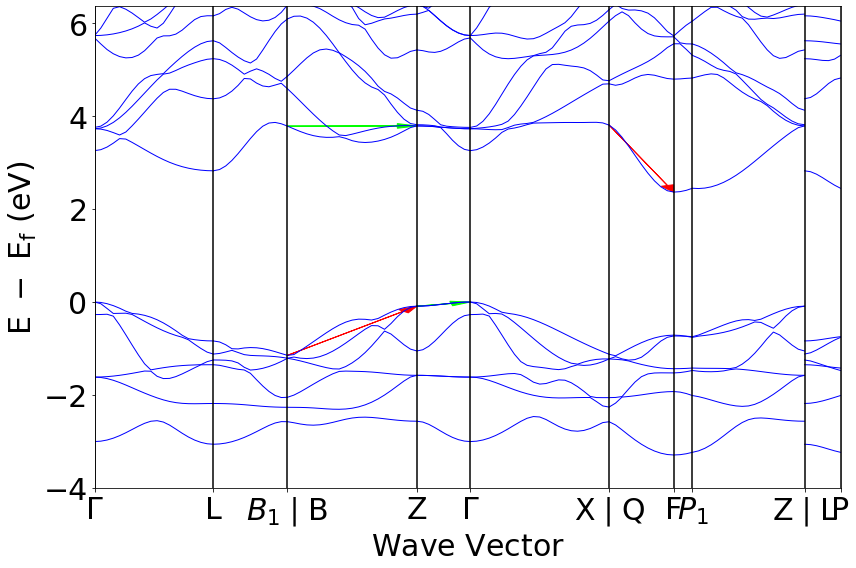

In [553]:
# Représentation graphique des bandes
print("La figure suivante représente les pentes minimales (vert, -) et maximales (rouge, +) de la dernière bande de valence et de la première bande de conduction.")
bsp.get_plot()

# Flèches de la bande de valence
plt.arrow(x[0],y[0],x[1]-x[0],y[1]-y[0],length_includes_head=True,head_width=0.1,color=(0,1,0,1))
plt.arrow(x[2],y[2],x[3]-x[2],y[3]-y[2],length_includes_head=True,head_width=0.1,color=(1,0,0,1))

# Flèches de la bande de conduction
plt.arrow(x[4],y[4],x[5]-x[4],y[5]-y[4],length_includes_head=True,head_width=0.1,color=(0,1,0,1))
plt.arrow(x[6],y[6],x[7]-x[6],y[7]-y[6],length_includes_head=True,head_width=0.1,color=(1,0,0,1))

# 3. Masse effective

On cherche à calculer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction. Nous supposons une dispersion parabolique. 
On commence par calculer les coordonnées du sommet et de la base, ainsi que de deux points proches de ce sommet et cette base. Avec ces points, on peut approximer une parabole et calculer la masse effective.

## a. Calcul des paraboles

In [559]:
# Parabole au sommet de la dernière bande de valence
ys = -10

#Calcul des coordonnées du sommet de la dernière bande de valence
for i in range (1,9):
    s = data.get("energy")[i].get("1")[14][0]
    if (s>ys):
        ys = s
        ref = i
        xs = a[i]
    i = i+1
print("Pour commencer, nous calculons les coordonnées du sommet de la dernière bande de valence, correspondant au point vert sur le graphe de la section 2 :")
print("(xs,ys) = (",xs,",",ys,")")

#Calcul des coordonées de deux points situés de part et d'autre du sommet.
xs2 = data['distances'][ref-1][0]
ys2 = data.get("energy")[ref-1].get("1")[14][0]
xs3 = data['distances'][ref+1][0]
ys3 = data.get("energy")[ref+1].get("1")[14][0]
print("On prend deux points proches du sommet pour approximer par une parabole :")
print("(xs2,ys2) = (",xs2,",",ys2,")")
print("(xs3,ys3) = (",xs3,",",ys3,")")

# Avec les deux points proches de notre sommet, on extrapole une parabole.
xval = [xs2,xs,xs3]
yval = [ys2,ys,ys3]
xval_fit = np.polyfit(xval,yval,2)
xval_abs = np.linspace(xs-0.5,xs+1,1000)
yval_ord = xval_fit[0]*xval_abs**2 + xval_fit[1]*xval_abs + xval_fit[2]
print("Avec ces trois points, on peut approximer une parabole ax^2+bx+c de paramètres [a, b, c] = ", xval_fit)


Pour commencer, nous calculons les coordonnées du sommet de la dernière bande de valence, correspondant au point vert sur le graphe de la section 2 :
(xs,ys) = ( 2.880981432736445 , -9.999999999998899e-05 )
On prend deux point proche de la base ou du sommet pour approximer par une parabole :
(xs2,ys2) = ( 2.4713620080499967 , -0.08919999999999995 )
(xs3,ys3) = ( 3.9450507207568037 , -1.1248999999999998 )
Avec ces trois points, on peut approximer une parabole ax^2+bx+c de paramètres [a, b, c] =  [-0.86489975  4.84675949 -6.78480945]


In [561]:
# Parabole à la base de la première bande de conduction
yb = 10

#Calcul des coordonnées de la base de la première bande de conduction
for i in range (1,9):
    b = data.get("energy")[i].get("1")[15][0]
    if (b<yb):
        yb = b
        ref2 = i
        xb = a[i]
    i = i+1
print("Pour commencer, nous calculons les coordonnées de la base de la première bande de conduction, correspondant au point rouge sur le graphe de la section 2 :")
print("(xb,yb) = (",xb,",",yb,")")

#Calcul des coordonées de deux points situés de part et d'autre de la base.
xb2 = data['distances'][ref2-1][0]
yb2 = data.get("energy")[ref2-1].get("1")[15][0]
xb3 = data['distances'][ref2+1][0]
yb3 = data.get("energy")[ref2+1].get("1")[15][0]
print("On prend deux points proches de la base pour approximer par une parabole :")
print("(xb2,yb2) = (",xb2,",",yb2,")")
print("(xb3,yb3) = (",xb3,",",yb3,")")

# Avec les deux points proches de notre sommet, on extrapole une parabole.
xcond = [xb2,xb,xb3]
ycond = [yb2,yb,yb3]
print(xval,yval)
xcond_fit = np.polyfit(xcond,ycond,2)
xcond_abs = np.linspace(xb-0.5,xb+0.5,1000)
ycond_ord = xcond_fit[0]*xcond_abs**2 + xcond_fit[1]*xcond_abs + xcond_fit[2]
print("Avec ces trois points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] = ", xcond_fit)


Pour commencer, nous calculons les coordonnées de la base de la première bande de conduction, correspondant au point rouge sur le graphe de la section 2 :
(xb,yb) = ( 4.441239089049648 , 2.3680000000000003 )
On prend deux points proches de la base pour approximer par une parabole :
(xb2,yb2) = ( 3.9450507207568037 , 3.8109 )
(xb3,yb3) = ( 4.583914905644329 , 2.4503000000000004 )
[2.4713620080499967, 2.880981432736445, 3.9450507207568037] [-0.08919999999999995, -9.999999999998899e-05, -1.1248999999999998]
Avec ces trois points, on approxime une parabole ax^2+bx+c de paramètres [a, b, c] =  [  5.45468106 -48.65250443 110.85397699]


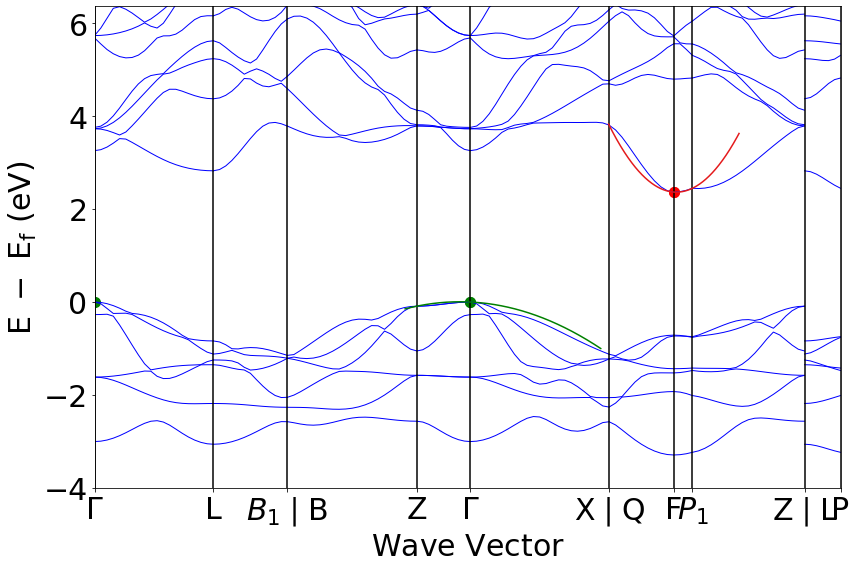

In [562]:
# Représentation graphique des paraboles
bsp.get_plot(vbm_cbm_marker=True)
plt.plot(xval_abs,yval_ord,'g')
plt.plot(xcond_abs,ycond_ord)
plt.show()

## b. Calcul des masses effectives
On calcule les masses effectives à l'aide de la formule :
$$\big(\frac{1}{m^*_e}\big)_{ij} = \big(\frac{1}{\hbar^2}\big)\big(\frac{\delta^2\epsilon}{\delta k_i\delta k_j}\big) $$
$$\leftrightarrow \big(m^*_e\big)_{ij} = \Bigg(\frac{\hbar^2}{\frac{\delta^2\epsilon}{\delta k_i\delta k_j}}\Bigg) $$
La dérivée seconde de l'énergie se calcule avec les paramètres de la paraboles. Dérivée deux fois, l'équation donne :
$$\frac{\delta^2\epsilon}{\delta k_i\delta k_j} = 2a $$

In [566]:
# 1eV = 1.602*10**(-19) 
hbar = 1.054*10**(-34) # constante en [J/s]

# Calcul de la masse effective au sommet de la dernière bande de valence
dsecv = 2*xval_fit[0] # dérivée seconde exprimée en [eV/Ansgtröm^2]
dsecv2 = (dsecv * (1.602*10**(-19)))/(10**(-10))**2 # dérivée seconde exprimée en [J/m]
mev = (hbar**2)/dsecv2
print("La masse effective au sommet de la dernière bande de valence vaut :",mev,"[J/m]")

# Calcul de la masse effective à la base de la première bande de conduction
dsecc = 2*xcond_fit[0] # dérivée seconde exprimée en [eV/Ansgtrom^2]
dsecc2 = (dsecc * (1.602*10**(-19)))/(10**(-10))**2 # dérivée seconde exprimée en [J/m]
mec = (hbar**2)/dsecc2
print("La masse effective à la base de la première bande de conduction vaut :",mec,"[J/m]")




La masse effective au sommet de la dernière bande de valence vaut : -4.008878943187629e-70 [J/m]
La masse effective à la base de la première bande de conduction vaut : 6.356519036948746e-71 [J/m]
